In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# Load the data into a pandas DataFrame
df = pd.read_csv("export.csv")

# Replace null values in the 'Industry' column with 'Finance and Insurance'
df['Industry'].fillna('Finance and Insurance', inplace=True)

# Replace null values in the 'Sub-Type' column with 'Exploitation of End Hosts'
df['Sub-Type'].fillna('Exploitation of End Hosts', inplace=True)

# One-hot encoding for categorical columns
categorical_cols = ['Location', 'Victim', 'Industry', 'Actor Location', 'Actor', 'Motive', 'Type', 'Sub-Type']
df_one_hot = pd.get_dummies(df, columns=categorical_cols)

# Assuming 'df' is your DataFrame containing the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])

# Preprocess the data
data_agg = df.groupby('Date').size().reset_index(name='Count')

# Convert the data type of the 'Date' column in df_one_hot to match data_agg
df_one_hot['Date'] = pd.to_datetime(df_one_hot['Date'])

# Merge one-hot encoded features with aggregated target
df_merged = pd.merge(df_one_hot, data_agg, on='Date')

# Split the data into train and test sets
X = df_merged.drop(columns=['Date', 'Count'])
y = df_merged['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Bayesian LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(), loss=MeanSquaredError())

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


C:\Users\sansk\AppData\Local\Temp\ipykernel_22660\2348395841.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\sansk\AppData\Local\Temp\ipykernel_22660\2348395841.py:28: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_one_hot['Date'] = pd.to_datetime(df_one_hot['Date'])



Epoch 1/100

325/325 [==============================] - 22s 46ms/step - loss: 109.0942 - val_loss: 84.8139
Epoch 2/100
325/325 [==============================] - 13s 41ms/step - loss: 80.5292 - val_loss: 72.8411
Epoch 3/100
325/325 [==============================] - 13s 41ms/step - loss: 63.2978 - val_loss: 65.2477
Epoch 4/100
325/325 [==============================] - 13s 41ms/step - loss: 48.4973 - val_loss: 59.3728
Epoch 5/100
325/325 [==============================] - 13s 41ms/step - loss: 39.4304 - val_loss: 55.4159
Epoch 6/100
325/325 [==============================] - 13s 40ms/step - loss: 31.0823 - val_loss: 53.8581
Epoch 7/100
325/325 [==============================] - 14s 42ms/step - loss: 24.1189 - val_loss: 51.1884
Epoch 8/100
325/325 [==============================] - 13s 41ms/step - loss: 19.4887 - val_loss: 47.1089
Epoch 9/100
325/325 [==============================] - 13s 41ms/step - loss: 15.4570 - val_loss: 44.6626
Epoch 10/100
325/325 [==============================

325/325 [==============================] - 14s 42ms/step - loss: 2.6896 - val_loss: 42.1024
Epoch 76/100
325/325 [==============================] - 14s 44ms/step - loss: 2.7910 - val_loss: 41.8783
Epoch 77/100
325/325 [==============================] - 14s 43ms/step - loss: 2.7177 - val_loss: 42.4718
Epoch 78/100
325/325 [==============================] - 14s 44ms/step - loss: 2.6700 - val_loss: 41.8910
Epoch 79/100
325/325 [==============================] - 14s 44ms/step - loss: 2.6305 - val_loss: 41.2103
Epoch 80/100
325/325 [==============================] - 14s 43ms/step - loss: 2.7289 - val_loss: 42.0733
Epoch 81/100
325/325 [==============================] - 14s 43ms/step - loss: 2.6006 - val_loss: 42.0563
Epoch 82/100
325/325 [==============================] - 14s 43ms/step - loss: 2.6404 - val_loss: 41.9326
Epoch 83/100
325/325 [==============================] - 14s 44ms/step - loss: 2.6313 - val_loss: 42.1488
Epoch 84/100
325/325 [==============================] - 15s 45ms/ste

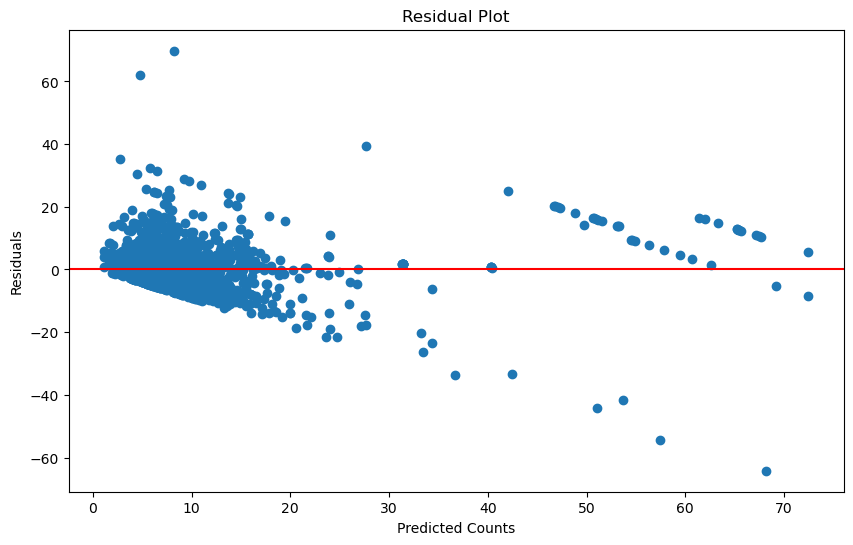

In [8]:
# Calculate residuals
residuals = y_test - y_pred_mean

# Plot residuals against predicted counts
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_mean, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Counts')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [12]:
from keras.layers import GRU

# Define the GRU model
model_gru = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(units=50, return_sequences=True),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the GRU model
model_gru.compile(optimizer=Adam(), loss=MeanSquaredError())

# Fit the GRU model to the training data
model_gru.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the GRU model
loss_gru = model_gru.evaluate(X_test, y_test)
print("Test Loss (GRU model):", loss_gru)


Epoch 1/100
325/325 [==============================] - 17s 35ms/step - loss: 103.1681 - val_loss: 81.4949
Epoch 2/100
325/325 [==============================] - 10s 32ms/step - loss: 75.1140 - val_loss: 67.8296
Epoch 3/100
325/325 [==============================] - 10s 32ms/step - loss: 55.1070 - val_loss: 61.6936
Epoch 4/100
325/325 [==============================] - 10s 32ms/step - loss: 42.1358 - val_loss: 55.8126
Epoch 5/100
325/325 [==============================] - 10s 32ms/step - loss: 33.8316 - val_loss: 53.0937
Epoch 6/100
325/325 [==============================] - 11s 33ms/step - loss: 25.6336 - val_loss: 51.0637
Epoch 7/100
325/325 [==============================] - 10s 32ms/step - loss: 18.9754 - val_loss: 47.2848
Epoch 8/100
325/325 [==============================] - 10s 31ms/step - loss: 14.9869 - val_loss: 45.3359
Epoch 9/100
325/325 [==============================] - 10s 32ms/step - loss: 11.8670 - val_loss: 46.6856
Epoch 10/100
325/325 [==============================] 

325/325 [==============================] - 11s 33ms/step - loss: 2.7408 - val_loss: 42.7172
Epoch 80/100
325/325 [==============================] - 11s 33ms/step - loss: 2.7799 - val_loss: 42.8688
Epoch 81/100
325/325 [==============================] - 11s 33ms/step - loss: 2.7161 - val_loss: 43.5492
Epoch 82/100
325/325 [==============================] - 11s 33ms/step - loss: 2.6274 - val_loss: 41.8527
Epoch 83/100
325/325 [==============================] - 10s 32ms/step - loss: 2.7903 - val_loss: 42.9981
Epoch 84/100
325/325 [==============================] - 11s 33ms/step - loss: 2.8620 - val_loss: 43.2596
Epoch 85/100
325/325 [==============================] - 11s 33ms/step - loss: 2.7447 - val_loss: 42.7270
Epoch 86/100
325/325 [==============================] - 11s 33ms/step - loss: 2.9047 - val_loss: 42.8443
Epoch 87/100
325/325 [==============================] - 11s 33ms/step - loss: 2.6902 - val_loss: 42.0513
Epoch 88/100
325/325 [==============================] - 11s 34ms/ste

In [ ]:

'''
Understand the characteristics of your data by visualizing it using plots, histograms, and summary statistics.
Explore relationships between different variables to identify patterns and correlations.
Feature Engineering:

Create new features from existing ones if needed.
Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.
Model Selection:

Choose an appropriate forecasting model based on the nature of your data and the problem you're trying to solve. Some common models include ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), Prophet, LSTM (Long Short-Term Memory), etc.
Split your dataset into training and testing sets. Typically, you'd use older data for training and more recent data for testing.
Model Training:

Train your chosen forecasting model on the training dataset.
Tune hyperparameters if necessary to improve the model's performance.
Model Evaluation:

Evaluate the performance of your model using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), etc.
Compare the predicted values with the actual values from the testing dataset.
Forecasting:

Once your model is trained and evaluated, use it to make predictions on unseen data.
Visualize the forecasted values along with the actual values to assess the accuracy of your model.
Iterate and Improve:

Based on the results of your model evaluation, iterate on the process to improve the performance of your forecasting model. This might involve refining features, trying different models, or adjusting hyperparameters.
Remember that building an effective forecasting model requires careful consideration of your data, model selection, and thorough evaluation. It's also an iterative process, so don't hesitate to experiment and refine your approach based on your findings.'''

In [ ]:
# Prepare lag features for time series forecasting
def prepare_lag_features(data, lag):
    df_lagged = data.copy()
    for i in range(1, lag+1):
        df_lagged[f'lag_{i}'] = df_lagged['Count'].shift(i)
    df_lagged.dropna(inplace=True)
    return df_lagged

# Choose the lag value for the number of lag features
lag = 5
df_lagged = prepare_lag_features(df_merged, lag)

# Split the data into train and test sets
X = df_lagged.drop(columns=['Date', 'Count'])
y = df_lagged['Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = rf_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print("Train RMSE:", train_rmse)

y_pred_test = rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Test RMSE:", test_rmse)

# Forecast future values
# Assuming you want to forecast for the next 10 periods
future_periods = 10
last_observation = df_lagged.iloc[-1].drop(['Date', 'Count'])
future_dates = pd.date_range(start=df_lagged['Date'].iloc[-1], periods=future_periods+1, freq='D')[1:]

future_data = pd.DataFrame(columns=last_observation.index)
for i in range(future_periods):
    future_data = future_data.append(last_observation, ignore_index=True)
future_data['Date'] = future_dates
future_data.set_index('Date', inplace=True)

for i in range(1, lag+1):
    future_data[f'lag_{i}'] = df_lagged['Count'].shift(-i).iloc[-1]

# Make predictions for future periods
future_predictions = rf_model.predict(future_data.dropna())

# Print future predictions
print("Future Predictions:", future_predictions)
